In [ ]:
import os
import supervision as sv
from PIL import Image
import numpy as np
import cv2

import pycocotools.mask as mask_util
from groundingdino.util.inference import load_model, load_image, predict, annotate

In [3]:
CONFIG_PATH = "groundingdino/config/GroundingDINO_SwinT_OGC.py"
WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join("weights", WEIGHTS_NAME)
detection_model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/home/ueno/.conda/envs/dino/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


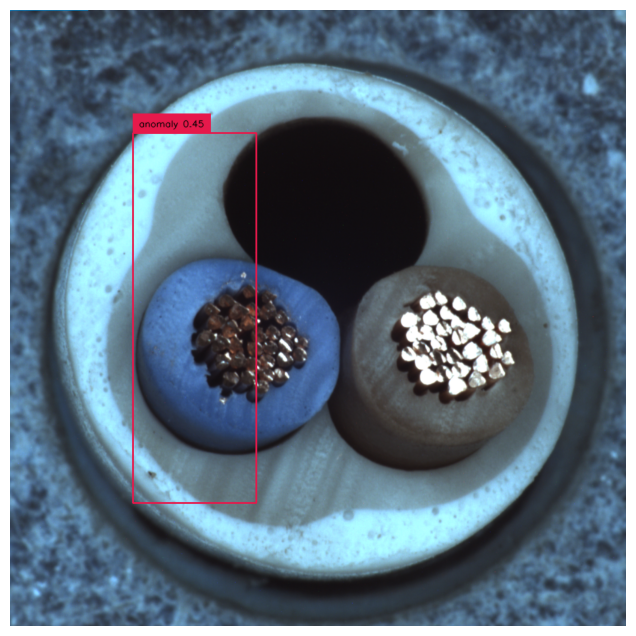

In [60]:
IMAGE_PATH = "/home/data/mvtec/bottle/test/broken_large/000.png"
TEXT_PROMPT = "anomaly"
BOX_TRESHOLD = 0.3
TEXT_TRESHOLD = 0.3

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=detection_model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD
)
# boxes = [xmin, ymin, 横幅, 縦幅]
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

# %matplotlib inline  
sv.plot_image(annotated_frame, (8, 8))